In [1]:
#%% file import pre procesing
import pandas as pd
import numpy as np



#plots
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
# read in pup merged file 
le16_df = pd.read_excel('le16_p14_calls.xlsx')
le15_df = pd.read_excel('le15_p14_calls.xlsx')

pup_df = pd.concat([le16_df,le15_df])
pup_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype
0,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,1,Usv,True,0.624447,15.606167,15.625438,0.019271,36.476648,36.243132,37.644231,1.401099,0.590755,23.427024,1.203332,-97.472034,0.247498,37.644231,WT
1,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,2,Usv,True,0.536672,49.924696,49.967026,0.042329,68.803502,65.661479,70.622568,4.961089,1.823892,63.342752,1.909888,-104.364848,0.195837,70.622568,WT
2,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,3,Usv,True,0.654665,51.288950,51.309374,0.020424,58.434633,57.264908,60.384174,3.119266,1.245267,38.633587,1.571769,-102.419875,0.188441,59.604358,WT
3,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,4,Short,True,0.562621,92.325944,92.331173,0.005229,66.386719,62.070312,67.382812,5.312500,2.005974,814.827346,1.650997,-76.692259,0.392286,66.718750,WT
4,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,5,Usv,True,0.811888,113.121267,113.131814,0.010547,67.423780,64.573171,69.756098,5.182927,1.726071,351.546927,1.621528,-81.221601,0.565201,67.164634,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,33,Usv,True,0.576086,275.119146,275.140110,0.020965,36.559343,34.842172,37.847222,3.005051,0.901588,76.877677,1.415094,-105.524428,0.174650,37.847222,KO
801,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,34,Flat,True,0.696477,286.629046,287.435776,0.806729,30.680015,28.919321,40.629301,11.709980,3.715750,-14.024916,1.041005,-78.307884,0.459822,36.159029,KO
802,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,35,Usv,True,0.609666,293.973794,293.996894,0.023100,61.535904,59.727394,63.344415,3.617021,1.041742,131.303308,1.096388,-89.717212,0.348353,60.631649,KO
803,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,36,Usv,True,0.645543,294.009152,294.103881,0.094729,41.406840,36.595519,45.576651,8.981132,2.749973,-90.314400,2.051698,-77.609364,0.683792,36.595519,KO


In [3]:
# if row contains iso1 set iso 1 in timepoint column'


pup_df['Timepoint'] = pup_df["File"].str.extract("(iso1|iso2)")[0] #grab isolation from filename
#pup_df['Rat'] = pup_df['File'].str.extract(r'Detections\\(.*?_)') # grab rat name in filename
#('(fxs_calls\.*?)\_')
pup_df['Timepoint'].unique()

array(['iso1', 'iso2'], dtype=object)

# Call Number comparison

In [4]:
# call number compared
pup_df_g = pup_df.groupby(['Genotype','Timepoint']).count() # counts number of rows(calls) per rat
pup_df_g = pup_df_g.reset_index() # adds indices back to columns for graphing


### Call number graphs

Text(0.5, 1.0, 'Average Call Number p3')

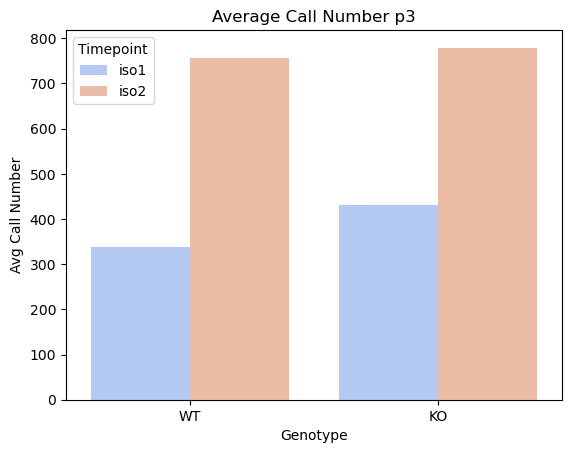

In [5]:
# graph male genotype differences in average call number

sns.barplot(data = pup_df_g,x = 'Genotype',y='File',hue='Timepoint', hue_order = ['iso1', 'iso2'],order = ['WT','KO'],palette='coolwarm')
plt.ylabel('Avg Call Number')
plt.xlabel('Genotype')
plt.title('Average Call Number p3')   


In [6]:
# graph male genotype differences in call number over time
first_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 0) & (pup_df['Begin Time (s)'] <= 60)] #get indexes from time range
pup_df.loc[first_min_ind, 'Minute'] = 1 # add label for graphing to indicate timepoint

sec_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 61) & (pup_df['Begin Time (s)'] <= 120)]
pup_df.loc[sec_min_ind, 'Minute'] = 2

thrd_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 121) & (pup_df['Begin Time (s)'] <= 180)]
pup_df.loc[thrd_min_ind, 'Minute'] = 3

four_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 181) & (pup_df['Begin Time (s)'] <= 300)]
pup_df.loc[four_min_ind, 'Minute'] = 4

pup_df_min_g = pup_df.groupby(['Genotype','Timepoint','Minute']).count() # count number of calls per minute
pup_df_min_g = pup_df_min_g.reset_index() # adds indices back to columns for graphing
pup_df_min_g


,Genotype,Timepoint,Minute,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),...,Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
0,KO,iso1,1.0,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
1,KO,iso1,2.0,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
2,KO,iso1,3.0,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
3,KO,iso1,4.0,267,267,267,267,267,267,267,...,267,267,267,267,267,267,267,267,267,267
4,KO,iso2,1.0,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,KO,iso2,2.0,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
6,KO,iso2,3.0,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
7,KO,iso2,4.0,522,522,522,522,522,522,522,...,522,522,522,522,522,522,522,522,522,522
8,WT,iso1,1.0,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
9,WT,iso1,2.0,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72


Text(0.5, 1.0, 'Avg Call per Minute Male')

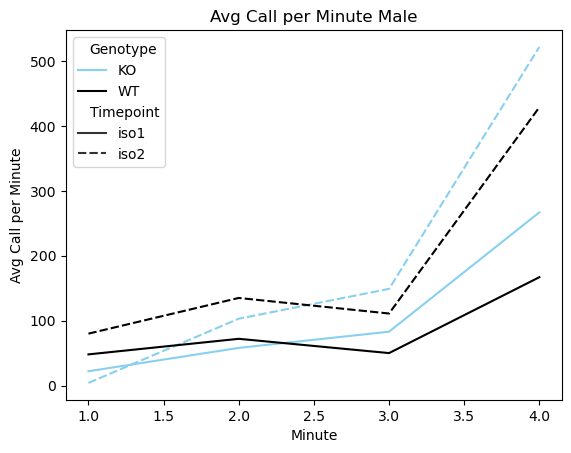

In [7]:
# cont
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=pup_df_min_g,x='Minute',y='ID',hue='Genotype',style='Timepoint',hue_order=['KO','WT'])
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute Male') 

Text(0.5, 1.0, 'Avg Call per Minute 1st Isolation')

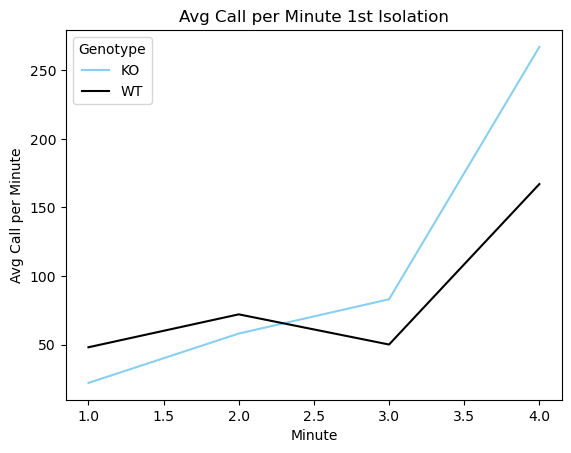

In [8]:
# graph just pre-mom
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso1']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 1st Isolation') 

Text(0.5, 1.0, 'Avg Call per Minute 2nd Isolation')

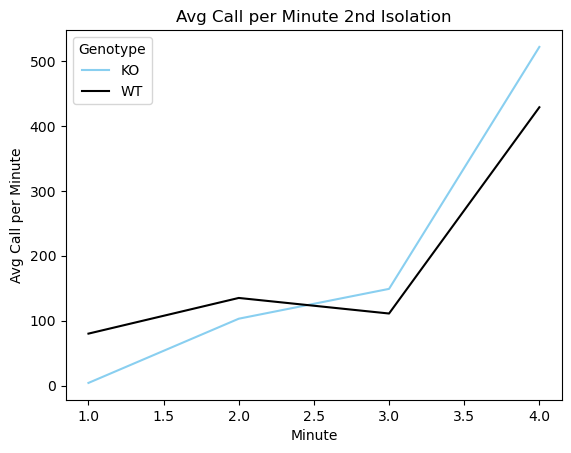

In [9]:
# graph just post-mom
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso2']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 2nd Isolation') 

# Duration Comparison

Text(0.5, 1.0, 'Avg Duration')

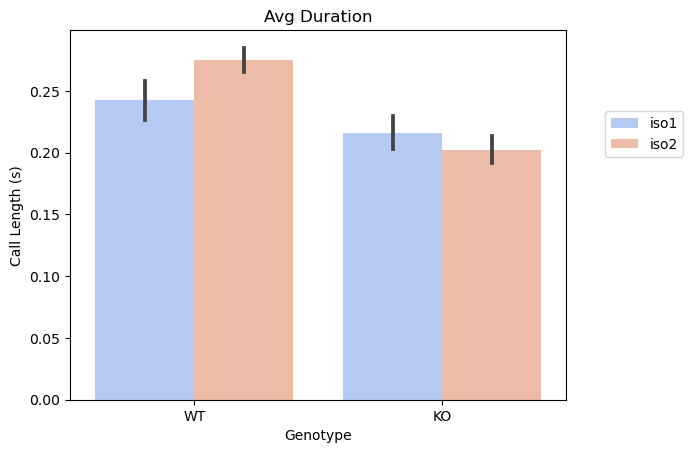

In [10]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Call Length (s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Duration') 

Text(0.5, 1.0, 'Avg Duration per Minute')

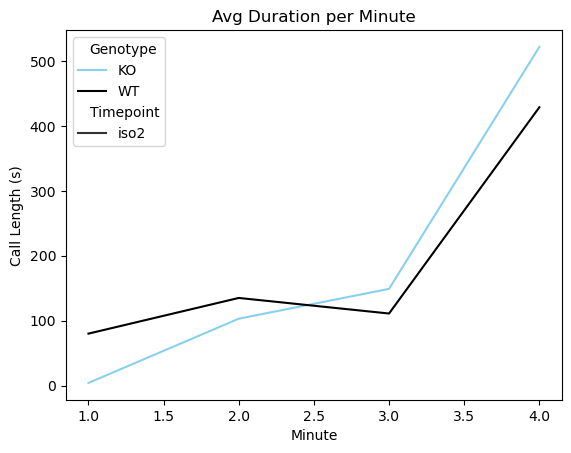

In [11]:
# duration over time both
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Call Length (s)',hue='Genotype',style='Timepoint')
plt.title('Avg Duration per Minute') 

# Principal Freq

In [12]:
pup_df
test = pup_df.reset_index()
test

,index,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),...,Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Timepoint,Minute
0,0,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,1,Usv,True,0.624447,15.606167,15.625438,0.019271,36.476648,...,1.401099,0.590755,23.427024,1.203332,-97.472034,0.247498,37.644231,WT,iso1,4.0
1,1,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,2,Usv,True,0.536672,49.924696,49.967026,0.042329,68.803502,...,4.961089,1.823892,63.342752,1.909888,-104.364848,0.195837,70.622568,WT,iso1,1.0
2,2,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,3,Usv,True,0.654665,51.288950,51.309374,0.020424,58.434633,...,3.119266,1.245267,38.633587,1.571769,-102.419875,0.188441,59.604358,WT,iso1,1.0
3,3,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,4,Short,True,0.562621,92.325944,92.331173,0.005229,66.386719,...,5.312500,2.005974,814.827346,1.650997,-76.692259,0.392286,66.718750,WT,iso1,2.0
4,4,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,5,Usv,True,0.811888,113.121267,113.131814,0.010547,67.423780,...,5.182927,1.726071,351.546927,1.621528,-81.221601,0.565201,67.164634,WT,iso1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,800,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,33,Usv,True,0.576086,275.119146,275.140110,0.020965,36.559343,...,3.005051,0.901588,76.877677,1.415094,-105.524428,0.174650,37.847222,KO,iso1,4.0
2299,801,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,34,Flat,True,0.696477,286.629046,287.435776,0.806729,30.680015,...,11.709980,3.715750,-14.024916,1.041005,-78.307884,0.459822,36.159029,KO,iso1,4.0
2300,802,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,35,Usv,True,0.609666,293.973794,293.996894,0.023100,61.535904,...,3.617021,1.041742,131.303308,1.096388,-89.717212,0.348353,60.631649,KO,iso1,4.0
2301,803,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,36,Usv,True,0.645543,294.009152,294.103881,0.094729,41.406840,...,8.981132,2.749973,-90.314400,2.051698,-77.609364,0.683792,36.595519,KO,iso1,4.0


Text(0.5, 1.0, 'Avg Principal Frequency')

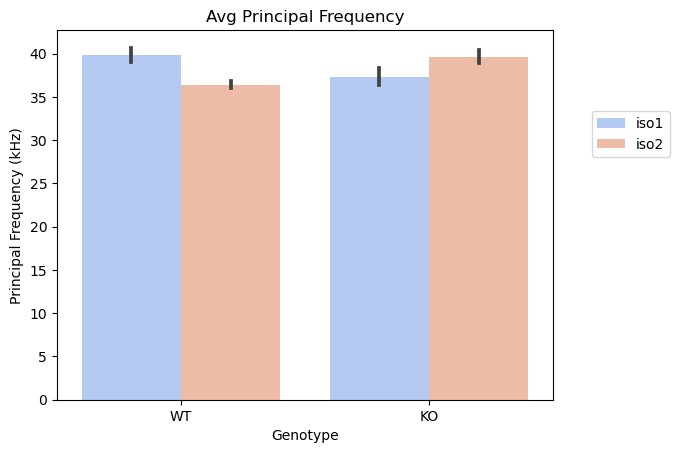

In [13]:
# both sexes
sns.barplot(data=pup_df,x='Genotype',y='Principal Frequency (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Principal Frequency') 

# Slope Comparison

Text(0.5, 1.0, 'Avg Slope')

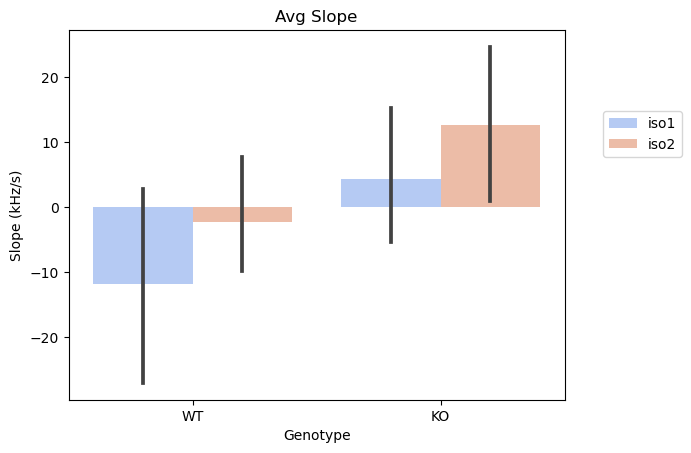

In [14]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Slope (kHz/s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Slope') 


Text(0.5, 1.0, 'Avg Slope per Minute')

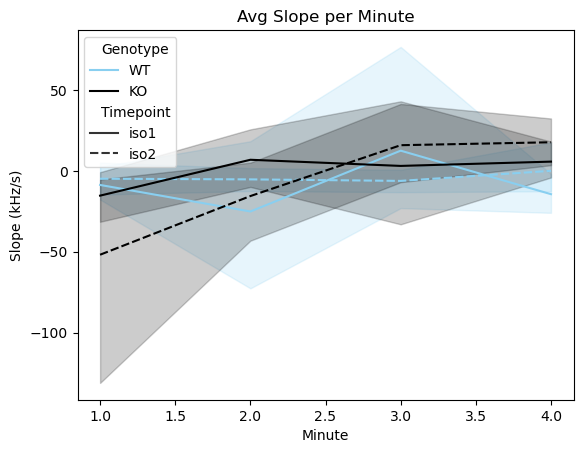

In [15]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Slope (kHz/s)',hue='Genotype',style='Timepoint')
plt.title('Avg Slope per Minute') 

# Delta Frequency 


Text(0.5, 1.0, 'Avg Delta Frequency')

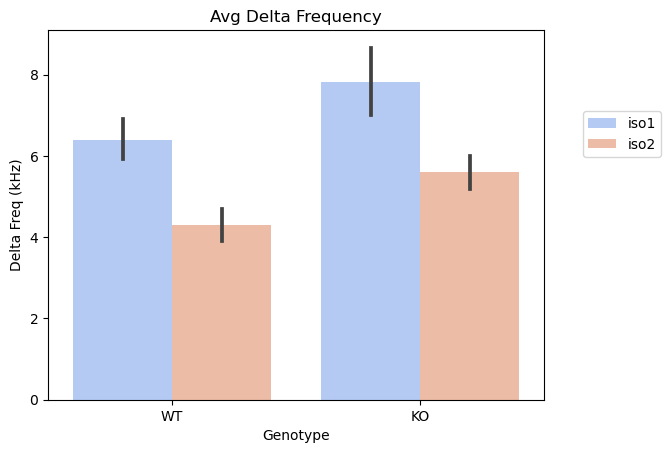

In [16]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Delta Freq (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Delta Frequency') 


Text(0.5, 1.0, 'Avg Delta Frequency per Minute')

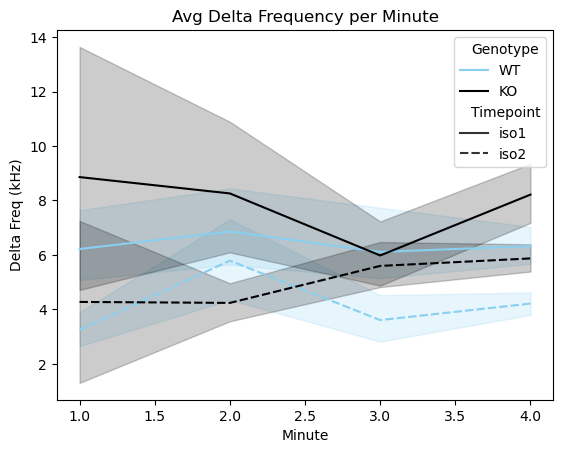

In [17]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Delta Freq (kHz)',hue='Genotype',style='Timepoint')
plt.title('Avg Delta Frequency per Minute') 

# Sinusoity

Text(0.5, 1.0, 'Avg Sinuosity Frequency')

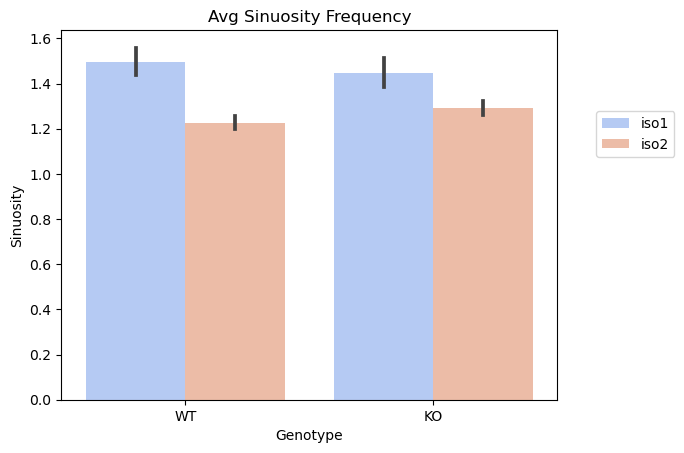

In [18]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Sinuosity',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Sinuosity Frequency')

Text(0.5, 1.0, 'Avg Sinuosity per Minute')

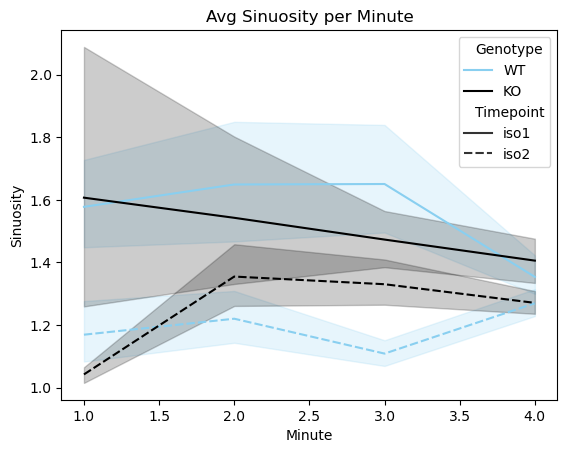

In [19]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Sinuosity',hue='Genotype',style='Timepoint')
plt.title('Avg Sinuosity per Minute') 

# Mean Power


Text(0.5, 1.0, 'Avg Mean Power (dB/Hz)')

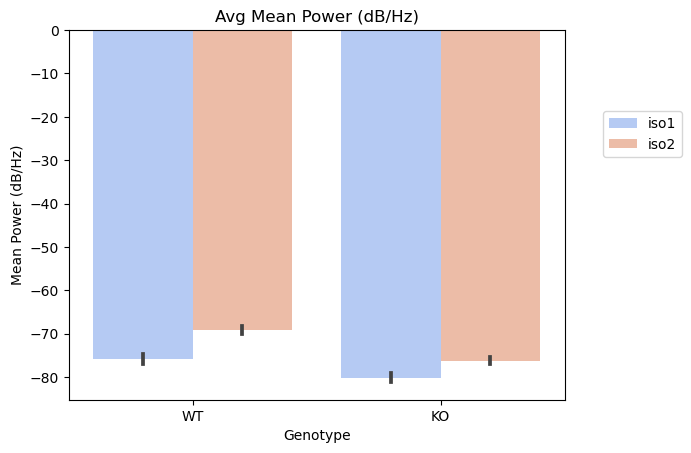

In [20]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Mean Power (dB/Hz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Mean Power (dB/Hz)')

Text(0.5, 1.0, 'Avg Mean Power per Minute')

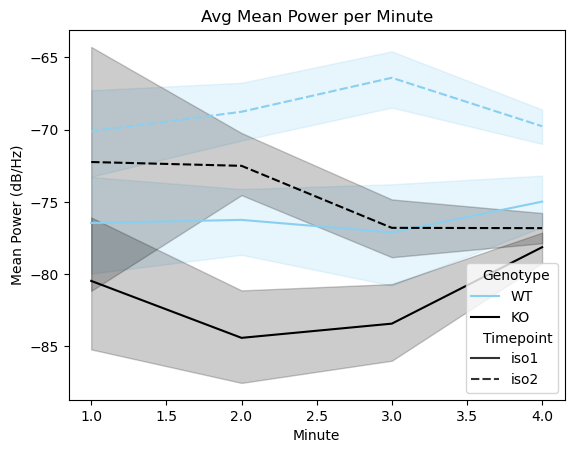

In [21]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Mean Power (dB/Hz)',hue='Genotype',style='Timepoint')
plt.title('Avg Mean Power per Minute') 

# Tonality

Text(0.5, 1.0, 'Avg Tonality')

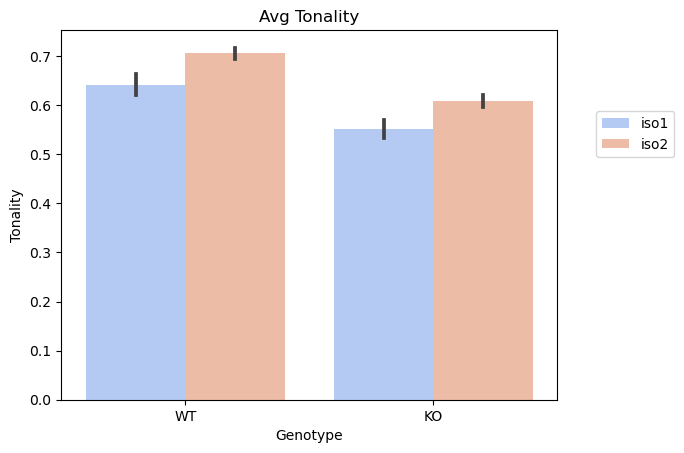

In [27]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Tonality',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Tonality')

Text(0.5, 1.0, 'Avg Tonality per Minute')

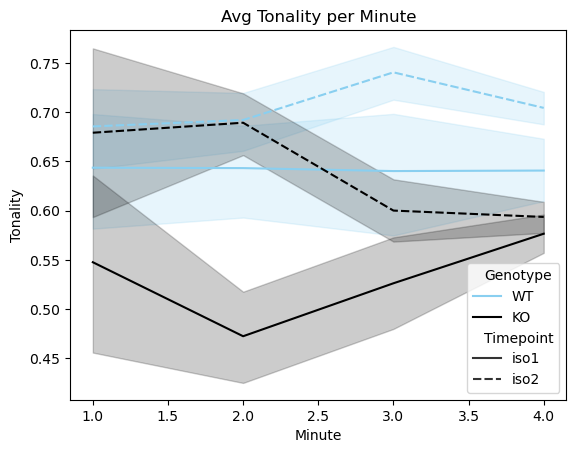

In [23]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Tonality',hue='Genotype',style='Timepoint')
plt.title('Avg Tonality per Minute') 

# Call Type Comparison

In [24]:
# pie chart between wt and het
KO_flat_df = pup_df.loc[pup_df['Genotype'] == 'KO']
wt_flat_df = pup_df.loc[pup_df['Genotype'] == 'WT']
wt_flat_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),...,Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Timepoint,Minute
0,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,1,Usv,True,0.624447,15.606167,15.625438,0.019271,36.476648,36.243132,...,1.401099,0.590755,23.427024,1.203332,-97.472034,0.247498,37.644231,WT,iso1,4.0
1,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,2,Usv,True,0.536672,49.924696,49.967026,0.042329,68.803502,65.661479,...,4.961089,1.823892,63.342752,1.909888,-104.364848,0.195837,70.622568,WT,iso1,1.0
2,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,3,Usv,True,0.654665,51.288950,51.309374,0.020424,58.434633,57.264908,...,3.119266,1.245267,38.633587,1.571769,-102.419875,0.188441,59.604358,WT,iso1,1.0
3,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,4,Short,True,0.562621,92.325944,92.331173,0.005229,66.386719,62.070312,...,5.312500,2.005974,814.827346,1.650997,-76.692259,0.392286,66.718750,WT,iso1,2.0
4,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,5,Usv,True,0.811888,113.121267,113.131814,0.010547,67.423780,64.573171,...,5.182927,1.726071,351.546927,1.621528,-81.221601,0.565201,67.164634,WT,iso1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,11,Usv,True,0.529241,261.779617,261.796605,0.016988,40.937500,38.715278,...,3.888889,1.360828,22.190894,1.320748,-105.384192,0.217112,38.715278,WT,iso2,4.0
12,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,12,Usv,True,0.514642,282.586113,282.631513,0.045400,62.243943,58.873899,...,7.488987,2.121984,-27.870069,3.051217,-102.335208,0.205248,63.741740,WT,iso2,4.0
13,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,13,Usv,True,0.535620,289.797875,289.837580,0.039706,72.136454,69.088645,...,4.402390,2.040321,42.990699,1.824943,-104.617225,0.180449,72.136454,WT,iso2,4.0
14,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,14,Short,True,0.543452,296.732874,296.758404,0.025529,55.554435,53.595910,...,3.133641,1.481246,-128.337673,1.106279,-103.434283,0.219793,55.554435,WT,iso2,4.0


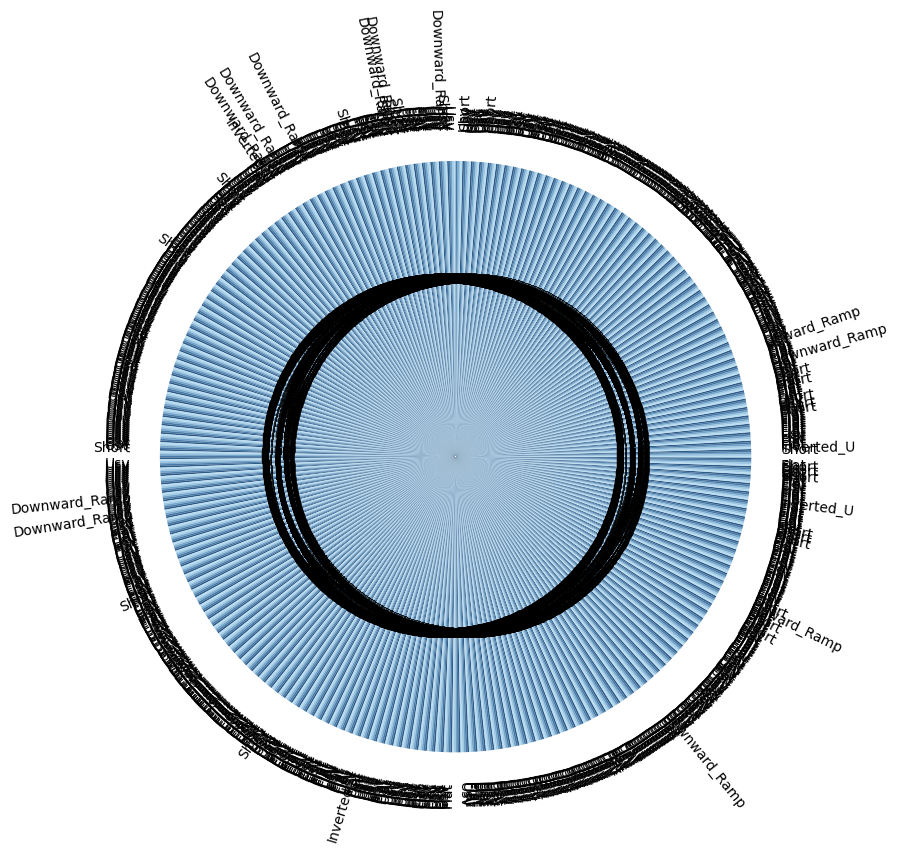

In [25]:
# WT pie chart

wtdata = wt_flat_df['Accepted']
wtdata = np.array(wtdata)
wtlabel = wt_flat_df['Label']
wtlabel = np.array(wtlabel)
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(wtdata, labels = wtlabel,startangle = 90,autopct = '%1.1f%%',rotatelabels = True,colors = colors,radius=2)
plt.show()


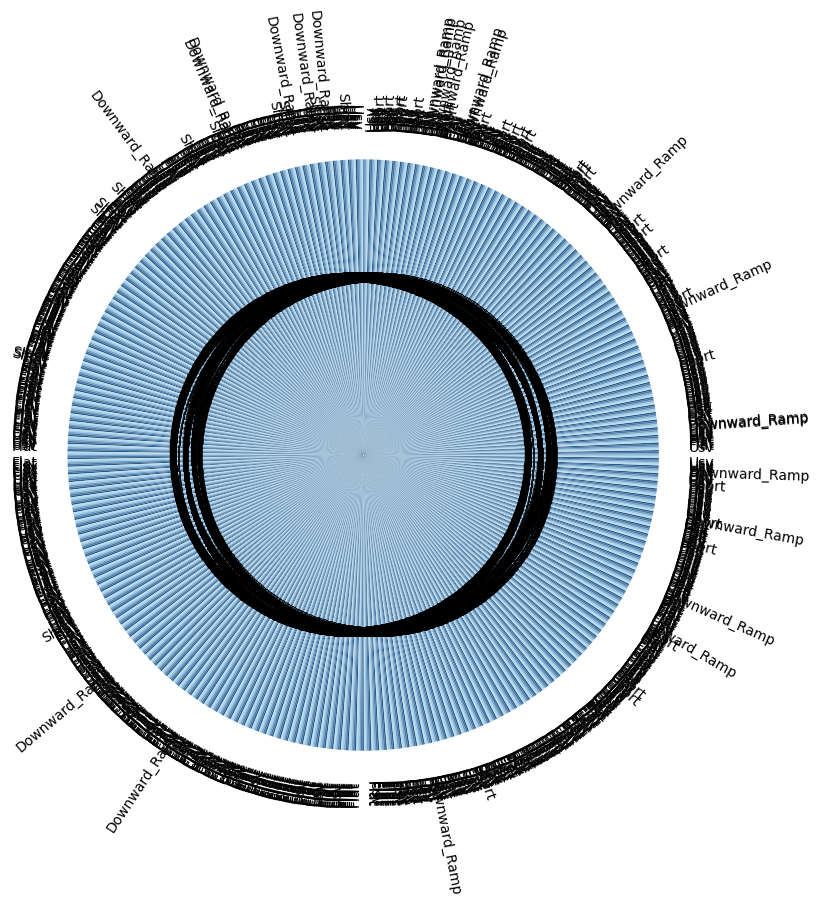

In [26]:
# het pie chart
hetdata = KO_flat_df['Accepted']
hetdata = np.array(hetdata)
hetlabel = KO_flat_df['Label']
hetlabel = np.array(hetlabel)
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(hetdata, labels = hetlabel,startangle = 90,autopct = '%1.1f%%',rotatelabels = True,colors = colors,radius=2)
plt.show()